In [10]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score

names = ["duration","protocoltype","service","flag","srcbytes","dstbytes","land", "wrongfragment","urgent","hot","numfailedlogins","loggedin", "numcompromised","rootshell","suattempted","numroot","numfilecreations", "numshells","numaccessfiles","numoutboundcmds","ishostlogin",
"isguestlogin","count","srvcount","serrorrate", "srvserrorrate","rerrorrate","srvrerrorrate","samesrvrate", "diffsrvrate", "srvdiffhostrate","dsthostcount","dsthostsrvcount","dsthostsamesrvrate", "dsthostdiffsrvrate","dsthostsamesrcportrate",
"dsthostsrvdiffhostrate","dsthostserrorrate","dsthostsrvserrorrate","dsthostrerrorrate","dsthostsrvrerrorrate","attack", "lastflag"]
# Read in the data into a dataframe
df = pd.read_csv("Data/Test.txt",sep=",",names=names)


# df.head()
df.describe()

,duration,srcbytes,dstbytes,land,wrongfragment,urgent,hot,numfailedlogins,loggedin,numcompromised,...,dsthostsrvcount,dsthostsamesrvrate,dsthostdiffsrvrate,dsthostsamesrcportrate,dsthostsrvdiffhostrate,dsthostserrorrate,dsthostsrvserrorrate,dsthostrerrorrate,dsthostsrvrerrorrate,lastflag
count,22544.000000,2.254400e+04,2.254400e+04,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,...,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000
mean,218.859076,1.039545e+04,2.056019e+03,0.000311,0.008428,0.000710,0.105394,0.021647,0.442202,0.119899,...,140.750532,0.608722,0.090540,0.132261,0.019638,0.097814,0.099426,0.233385,0.226683,18.017965
std,1407.176612,4.727864e+05,2.121930e+04,0.017619,0.142599,0.036473,0.928428,0.150328,0.496659,7.269597,...,111.783972,0.435688,0.220717,0.306268,0.085394,0.273139,0.281866,0.387229,0.400875,4.270361
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,15.000000,0.070000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000
50%,0.000000,5.400000e+01,4.600000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,168.000000,0.920000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000
75%,0.000000,2.870000e+02,6.010000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,255.000000,1.000000,0.060000,0.030000,0.010000,0.000000,0.000000,0.360000,0.170000,21.000000
max,57715.000000,6.282565e+07,1.345927e+06,1.000000,3.000000,3.000000,101.000000,4.000000,1.000000,796.000000,...,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,21.000000


In [11]:
# When looking at the above results we can see from the mean that some elements mostly have a value of 0. So we remove them as they are not that useful.

# df = df.drop(["land", "urgent", "numfailedlogins", "wrongfragment", "dsthostsrvdiffhostrate", "rootshell", "numshells"],axis=1)

# df.describe()

In [12]:
# Verify that there are no missing values

df.isna().sum()

duration                  0
protocoltype              0
service                   0
flag                      0
srcbytes                  0
dstbytes                  0
land                      0
wrongfragment             0
urgent                    0
hot                       0
numfailedlogins           0
loggedin                  0
numcompromised            0
rootshell                 0
suattempted               0
numroot                   0
numfilecreations          0
numshells                 0
numaccessfiles            0
numoutboundcmds           0
ishostlogin               0
isguestlogin              0
count                     0
srvcount                  0
serrorrate                0
srvserrorrate             0
rerrorrate                0
srvrerrorrate             0
samesrvrate               0
diffsrvrate               0
srvdiffhostrate           0
dsthostcount              0
dsthostsrvcount           0
dsthostsamesrvrate        0
dsthostdiffsrvrate        0
dsthostsamesrcportra

In [13]:
# We are only interested in normal and attack categories so map all attacks to 1 and normal to 0

df['attack'] = df['attack'].map(lambda x: 0 if x == 'normal' else 1)

In [14]:
# We want all attributes to be numeric, so check what attributes is not numeric

non_numeric_columns = df.select_dtypes(exclude=[int, float, bool]).columns

print("Non numeric columns", non_numeric_columns)

# We can see that protocoltype, service and flag are not numeric. We will convert these to numeric using LabelEncoder
label_encoders = {}
for column in non_numeric_columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

df.head()


Non numeric columns Index(['protocoltype', 'service', 'flag'], dtype='object')


,duration,protocoltype,service,flag,srcbytes,dstbytes,land,wrongfragment,urgent,hot,...,dsthostsamesrvrate,dsthostdiffsrvrate,dsthostsamesrcportrate,dsthostsrvdiffhostrate,dsthostserrorrate,dsthostsrvserrorrate,dsthostrerrorrate,dsthostsrvrerrorrate,attack,lastflag
0,0,1,45,1,0,0,0,0,0,0,...,0.04,0.06,0.00,0.00,0.0,0.0,1.00,1.00,1,21
1,0,1,45,1,0,0,0,0,0,0,...,0.00,0.06,0.00,0.00,0.0,0.0,1.00,1.00,1,21
2,2,1,19,9,12983,0,0,0,0,0,...,0.61,0.04,0.61,0.02,0.0,0.0,0.00,0.00,0,21
3,0,0,13,9,20,0,0,0,0,0,...,1.00,0.00,1.00,0.28,0.0,0.0,0.00,0.00,1,15
4,1,1,55,2,0,15,0,0,0,0,...,0.31,0.17,0.03,0.02,0.0,0.0,0.83,0.71,1,11


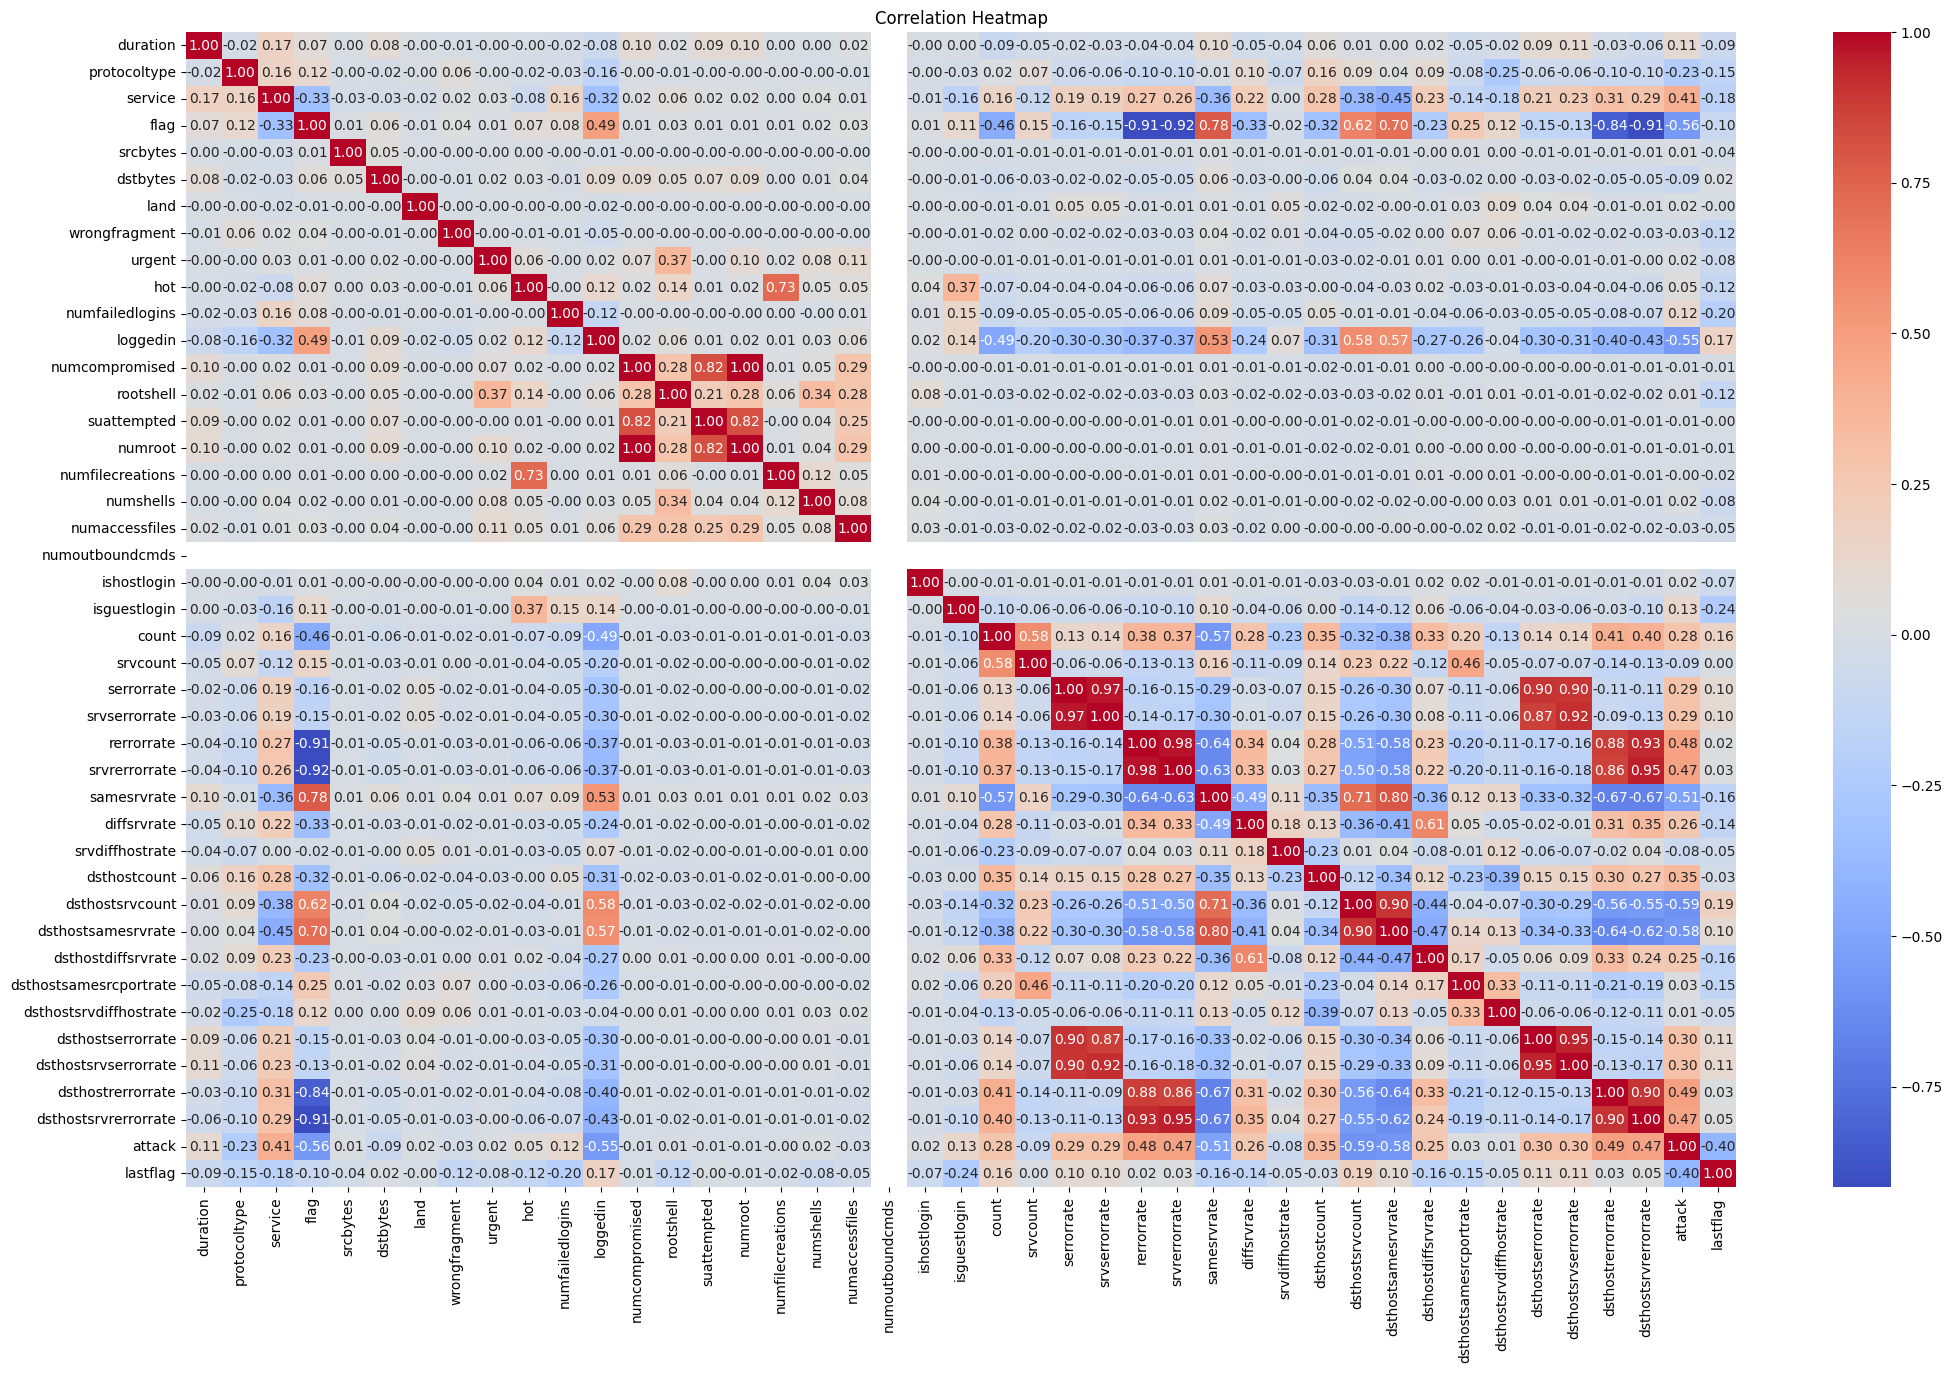

In [15]:
# df = df.drop(["numoutboundcmds"], axis=1)
plt.figure(figsize=(25, 15))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
# sns.heatmap(correlation_matrix)
plt.title('Correlation Heatmap')
plt.show()

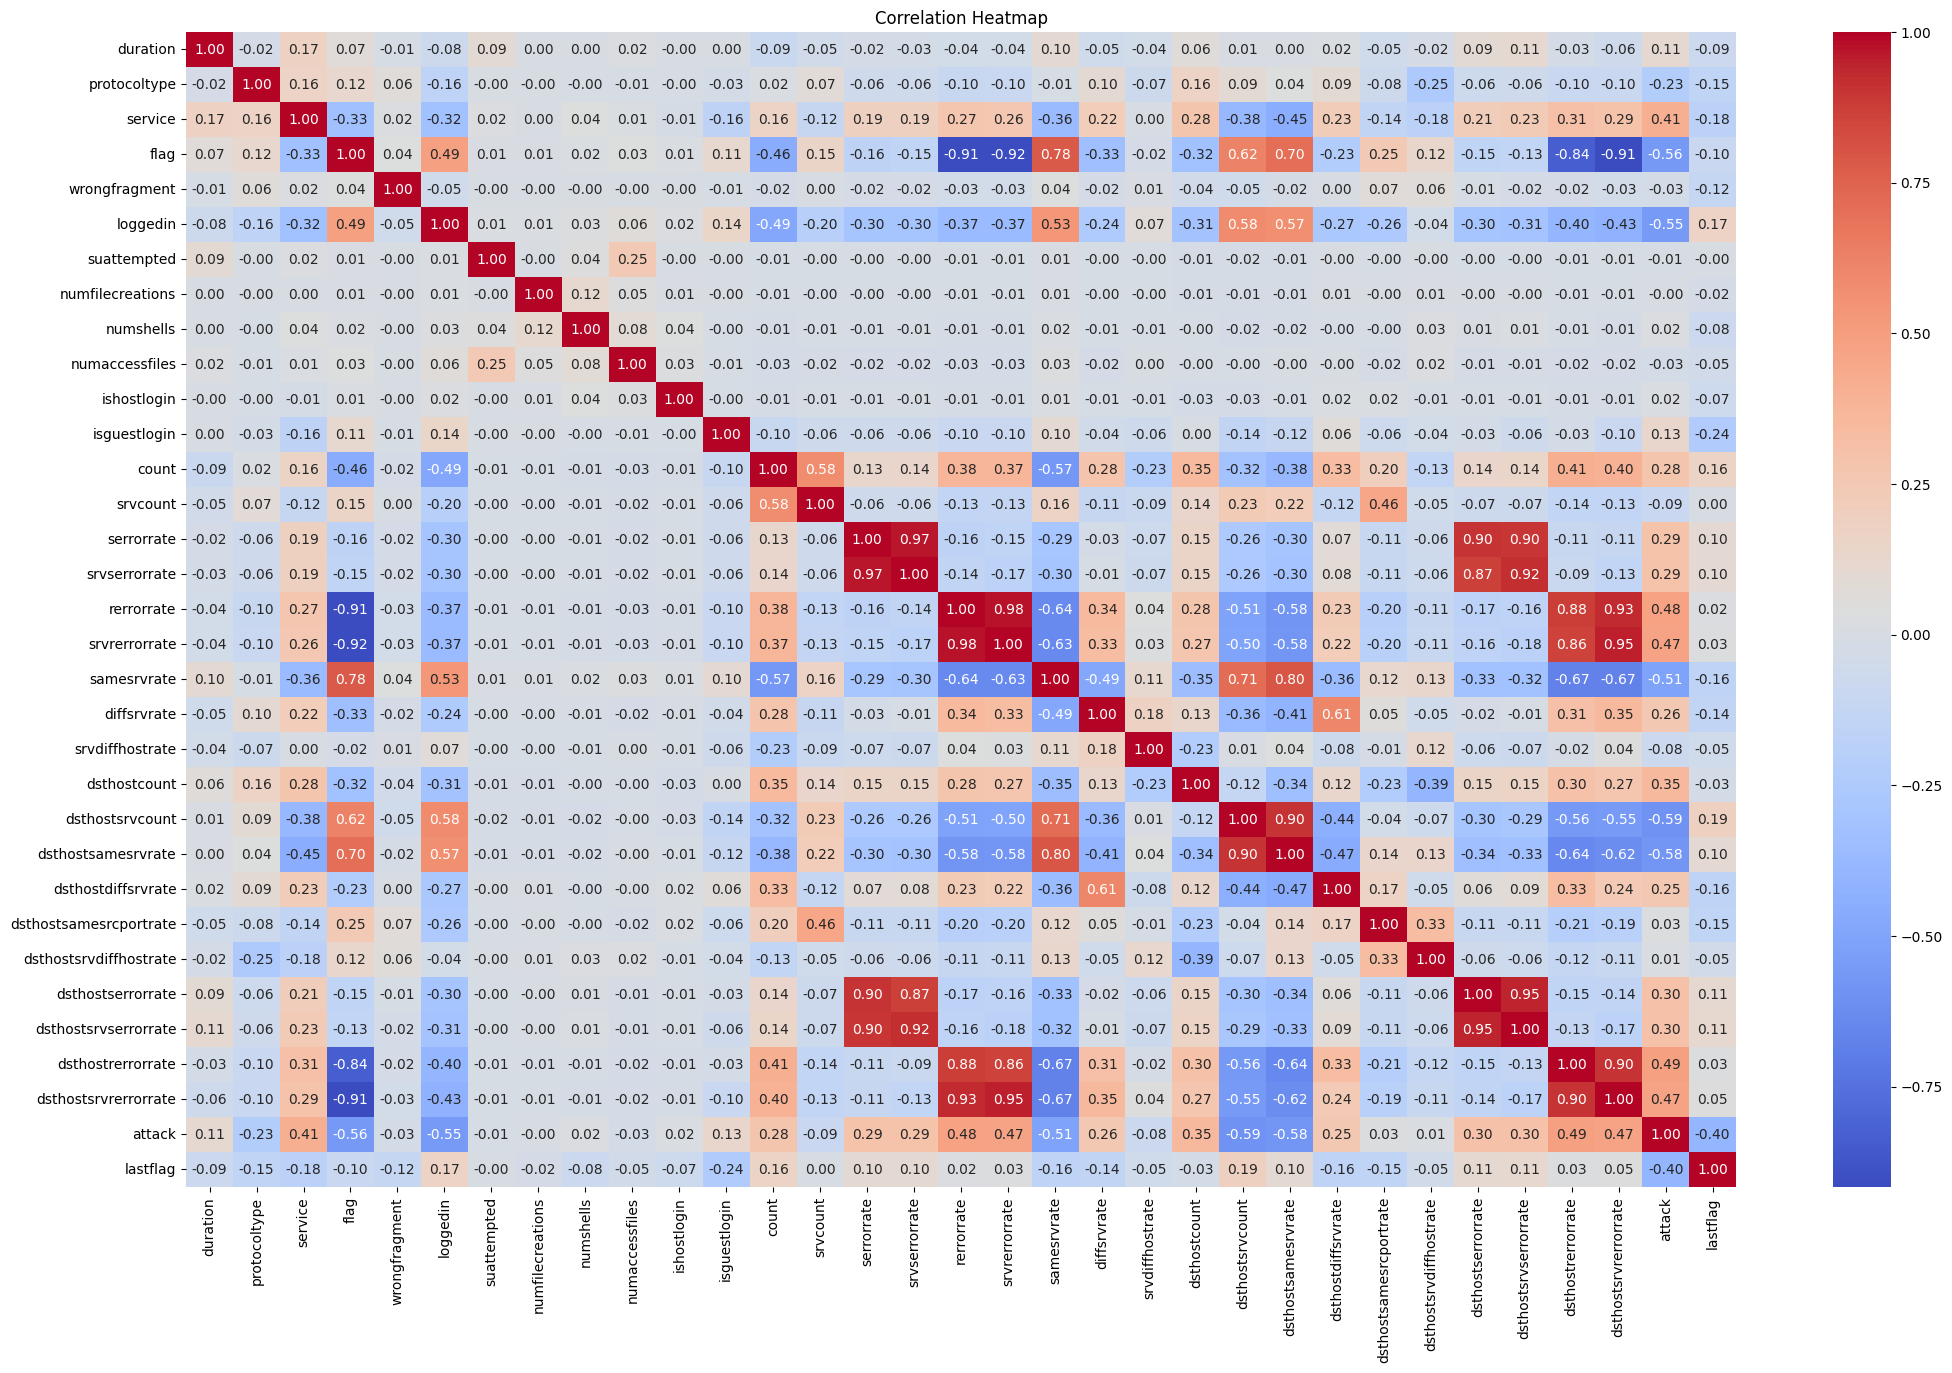

In [16]:
# From the correlation heatmap we can see that there are some attributes that are highly correlated. We will remove these attributes as they do not add any value to the model.

df = df.drop(["dstbytes", "urgent", "hot", "srcbytes", "land", "numfailedlogins", "numroot", "rootshell", "numcompromised", "numoutboundcmds" ], axis=1)

plt.figure(figsize=(25, 15))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
# sns.heatmap(correlation_matrix)
plt.title('Correlation Heatmap')
plt.show()

In [17]:
X=df.drop(['attack'],axis=1)
y=df['attack']


scaler = StandardScaler()
scaler.fit(X)
X_transformed = scaler.transform(X)

lr=LogisticRegression() # creates an instance of the Logistic Regression model. 
lr.fit(X_transformed,y) #  trains the Logistic Regression model on the training data. X_transformed represents the feature matrix (input variables), and y represents the target variable (labels or classes).
lr_pred=lr.predict(X_transformed) # generates predictions for the training set based on the trained Logistic Regression model.

lr_df=pd.DataFrame()
lr_df['actual']=y
lr_df['pred']=lr_pred

print(accuracy_score(y, lr_pred))

df.to_csv("Data/Test_cleaned.csv", index=False)

0.9602555003548616
